In [2]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import pylab
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from scipy.stats import shapiro
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
os.chdir("E:/Masaüstü/bootcamp") 

In [3]:
ad=pd.read_csv("https://raw.githubusercontent.com/UVBMOB/Ankara2019/master/Verisetleri/hmelq.csv")
df=ad.copy()
df.dropna(inplace=True)
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [6]:
df=df.drop(["bad","reason","job"], axis=1)

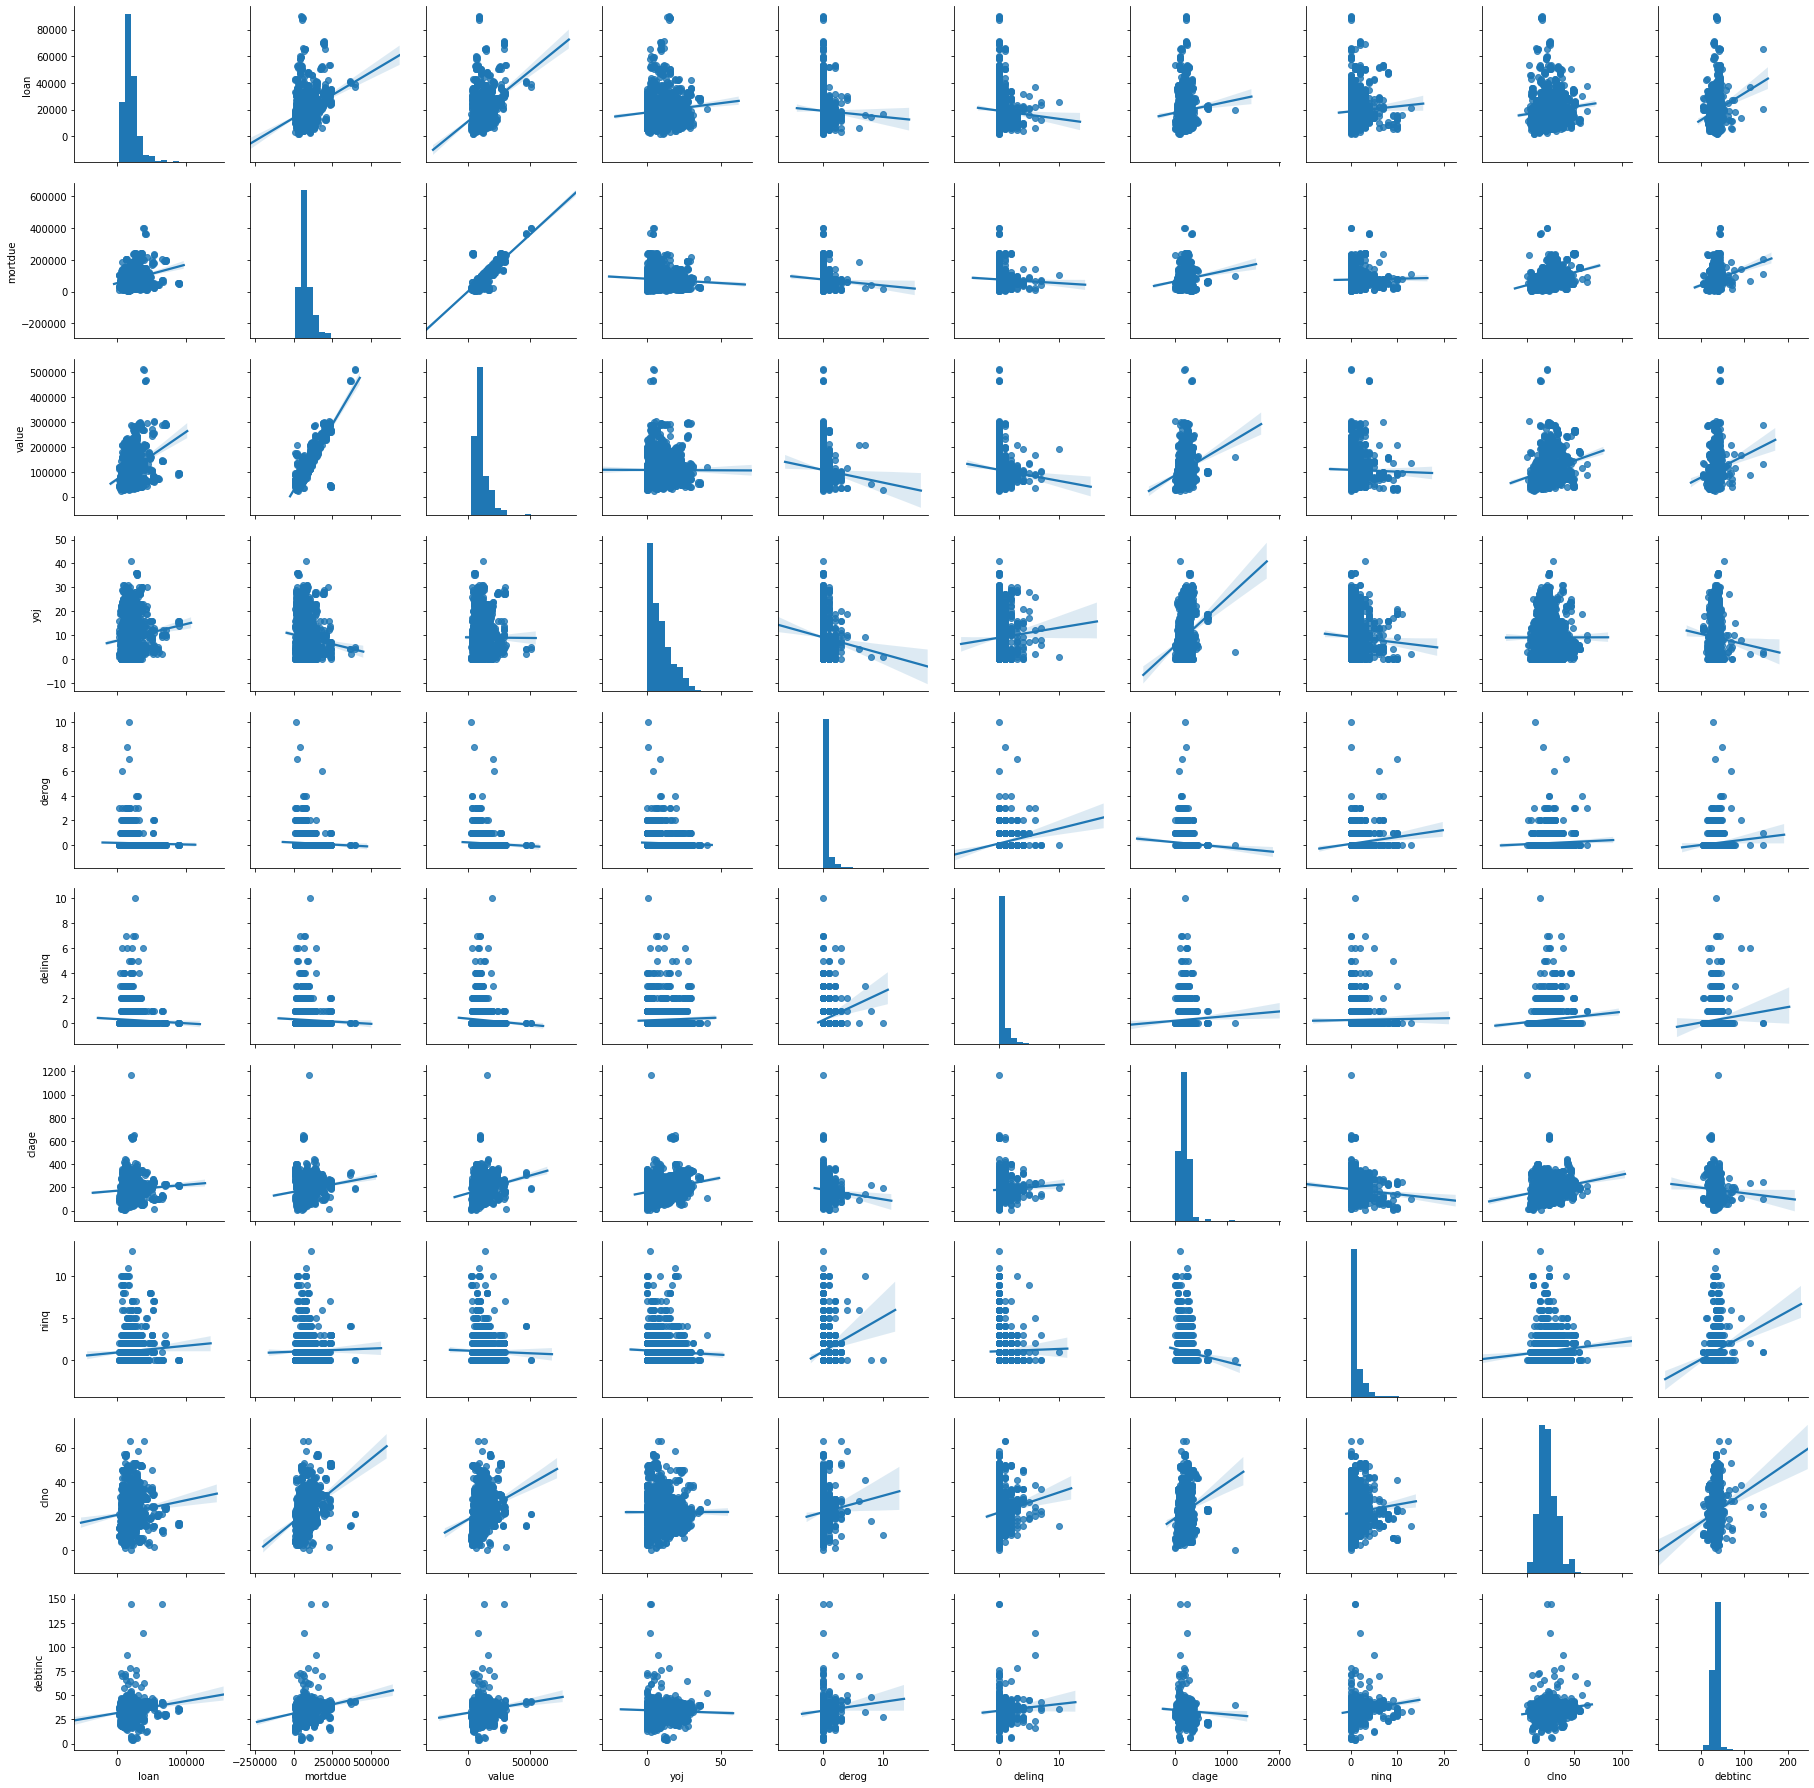

In [7]:
sns.pairplot(df,kind="reg")

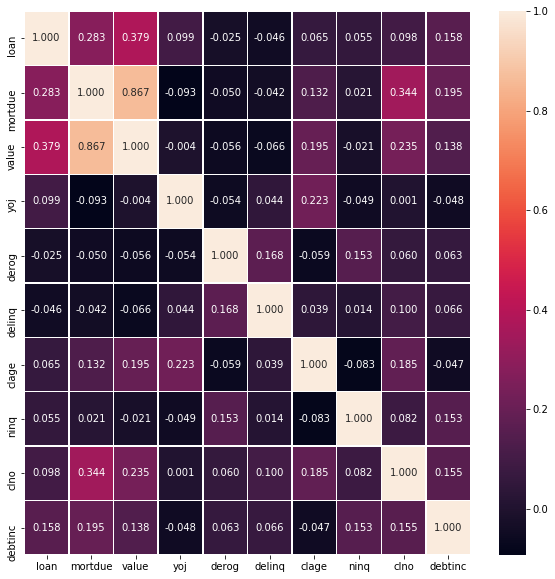

In [8]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt=".3f",ax=ax)
plt.show() 

In [9]:
#mortdue değeri ile value yu tahmin etmek istiyorum aralarında bağlantı var gibi gözüküyor

In [10]:
#ama ilk önce normalden gelip gelmediklerini kontrol ediyorum
print(len(df.value))
print(len(df.mortdue))
print(shapiro(df.value))
print(shapiro(df.mortdue))
#Normalden gelmiyorlar ama 30 dan fazla değer oldukları için normalden geldiğini varsayıyoruz.

2018
2018
(0.8436811566352844, 1.0142738414629458e-40)
(0.8624268174171448, 7.460412130575895e-39)


In [11]:
y=df["value"]
X=df[["mortdue"]]
X=sm.add_constant(X)
X[0:5]

E:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



,const,mortdue
153,1.0,94727.0
154,1.0,79240.0
155,1.0,241931.0
156,1.0,62989.0
157,1.0,25859.0


In [12]:
#tek değişkenli regression modelimi kuruyorum
lm=sm.OLS(y,X)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     6124.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:49:52   Log-Likelihood:                -23445.
No. Observations:                2018   AIC:                         4.689e+04
Df Residuals:                    2016   BIC:                         4.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.647e+04   1189.449     22.253      0.000    2.41e+04    2.88e+04
mortdue        1.0536      0.013     78.255      0.000       1.027       1.080
==============================================================================
Omnibus:                     1280.135   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80637.624
Skew:                          -2.245   Prob(JB):                         0.00
Kurtosis:                      33.641   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#hem constant hem de mortdue anlamlı değişkenler olarak görülüyor ama bir multicollinearity problemi olabilir (model beni uyardı)

In [14]:
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

[3.947319430795708, 1.0]

In [15]:
#multicollinearity problemi yok gibi gözüküyor.O zaman hata incelemeye geçelim

In [17]:
k_t=pd.DataFrame({"gercek_y":y[0:10],"tahmin_y":model.predict(X)[0:10]})
k_t["hata"]=k_t["gercek_y"]-k_t["tahmin_y"]
k_t["hata_kare"]=k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
153,136877.0,126275.218545,10601.781455,1.123978e+08
154,96784.0,109957.856961,-13173.856961,1.735505e+08
155,36486.0,281371.808888,-244885.808888,5.996906e+10
156,76718.0,92835.532230,-16117.532230,2.597748e+08
157,43684.0,53714.744755,-10030.744755,1.006158e+08
158,183533.0,174321.192949,9211.807051,8.485739e+07
159,97394.0,100969.453030,-3575.453030,1.278386e+07
160,114906.0,110139.079030,4766.920970,2.272354e+07
161,103016.0,108816.790092,-5800.790092,3.364917e+07
162,87025.0,80478.715760,6546.284240,4.285384e+07


In [18]:
print(np.sum(k_t["hata_kare"]))
print(np.mean(k_t["hata_kare"]))
print(np.sqrt(np.mean(k_t["hata_kare"])))
#hatalar çok yüksek gözüküyor

60812266149.753784
6081226614.975379
77982.21986437279


In [ ]:
#ilk önce residuallarına bakıcam

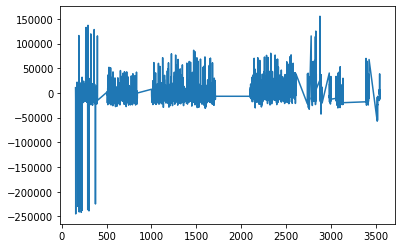

In [19]:
model.resid[0:10]
plt.plot(model.resid)

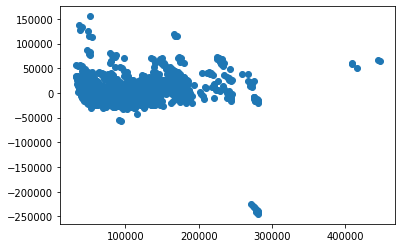

In [20]:
resid=model.resid
plt.scatter(model.predict(),resid)

In [ ]:
#rasgelelik yok

E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less



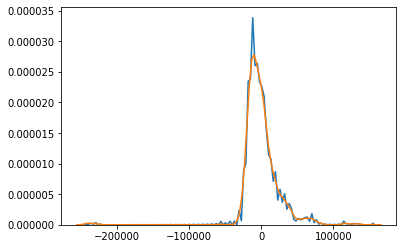

In [21]:
advres=pd.concat([ad,pd.Series(model.resid,name="resid"),pd.Series(model.predict(),name="predict")],axis=1)
sns.kdeplot(np.array(advres.resid),bw=10)
sns.distplot(np.array(advres.resid),hist=False)

In [22]:
advres = advres.dropna()
stat,p=shapiro(advres.resid)
print(stat," ",p)

0.5987489223480225   0.0


In [ ]:
#residuallar normal dağılımdan gelmiyor

In [ ]:
#son olarak modelin outlierlarına bakıcam ama model halihazırda kötü bir model zaten

leverage v.s. studentized residuals


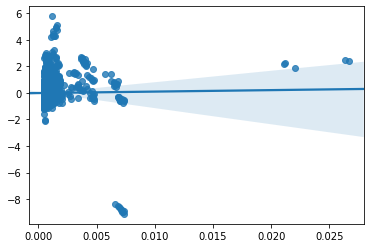

In [23]:
#outliner detection
influence=model.get_influence()
influence
resid_student=influence.resid_studentized_external
(cooks,p)=influence.cooks_distance
(dffits,p)=influence.dffits
leverage=influence.hat_matrix_diag
print("leverage v.s. studentized residuals")
sns.regplot(leverage,model.resid_pearson,fit_reg=True)
#yine kötü gelen outlierlar

In [24]:
#başka bir model kurmayı deneyeceğim ama bu sefer önce anlamlı değişkenleri görebilmek için bütün değişkenleri modele sokacağım

In [25]:
y=df["value"]
X=df.drop(["value"],axis=1)
X=sm.add_constant(X)
X[0:5]

,const,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc
153,1.0,18200,94727.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,1.0,21700,79240.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,1.0,34100,241931.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,1.0,8400,62989.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,1.0,17400,25859.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [26]:
lm=sm.OLS(y,X)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     830.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:54:38   Log-Likelihood:                -23288.
No. Observations:                2018   AIC:                         4.660e+04
Df Residuals:                    2008   BIC:                         4.665e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.004e+04   2835.461      7.068      0.000    1.45e+04    2.56e+04
loan           0.7095      0.055     12.977      0.000       0.602       0.817
mortdue        1.0378      0.014     73.349      0.000       1.010       1.066
yoj          311.5921     76.619      4.067      0.000     161.330     461.854
derog       1100.1240    987.287      1.114      0.265    -836.090    3036.338
delinq     -1436.5890    720.754     -1.993      0.046   -2850.093     -23.085
clage         48.1215      6.958      6.916      0.000      34.476      61.767
ninq       -1003.8954    361.861     -2.774      0.006   -1713.557    -294.234
clno        -450.2329     64.258     -7.007      0.000    -576.253    -324.213
debtinc     -177.9464     68.910     -2.582      0.010    -313.088     -42.805
==============================================================================
Omnibus:                     1420.034   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111073.802
Skew:                          -2.579   Prob(JB):                         0.00
Kurtosis:                      38.978   Cond. No.                     4.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#derog ve mortdue(önceki modeli beğenmediğim için yoksa p değeri iyi)hariç bütün değikenleri modele sokuyorum

In [28]:
y=df["value"]
X=df.drop(["value","derog","mortdue"],axis=1)
X=sm.add_constant(X)
X[0:5]

,const,loan,yoj,delinq,clage,ninq,clno,debtinc
153,1.0,18200,15.0,0.0,168.96,2.0,26.0,36.056
154,1.0,21700,5.0,0.0,64.51,6.0,24.0,38.079
155,1.0,34100,1.0,2.0,196.01,3.0,50.0,42.459
156,1.0,8400,3.0,2.0,131.47,0.0,22.0,29.200
157,1.0,17400,16.0,0.0,95.36,1.0,17.0,27.108


In [29]:
lm=sm.OLS(y,X)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     80.60
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          2.28e-103
Time:                        21:56:54   Log-Likelihood:                -24604.
No. Observations:                2018   AIC:                         4.922e+04
Df Residuals:                    2010   BIC:                         4.927e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.526e+04   5437.419      4.646      0.000    1.46e+04    3.59e+04
loan           1.7396      0.101     17.158      0.000       1.541       1.938
yoj         -495.2442    145.342     -3.407      0.001    -780.282    -210.207
delinq     -5118.3355   1361.773     -3.759      0.000   -7788.970   -2447.701
clage        101.0904     13.266      7.620      0.000      75.073     127.107
ninq       -1883.4289    687.309     -2.740      0.006   -3231.342    -535.516
clno         982.3936    117.302      8.375      0.000     752.348    1212.440
debtinc      474.8592    131.058      3.623      0.000     217.835     731.883
==============================================================================
Omnibus:                      714.044   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4712.285
Skew:                           1.506   Prob(JB):                         0.00
Kurtosis:                       9.854   Cond. No.                     1.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#model uyarı verdiği için tekrar multicolinarity testi yapıcam

In [31]:
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

[26.087088156852637,
 1.0512882731922972,
 1.0684312223580783,
 1.0202008955482336,
 1.1061353664107674,
 1.0379374999039277,
 1.0853340026056464,
 1.0786343189096173]

In [40]:
#constant harici hepsi kullanılabilir 
lm=sm.OLS(y,X)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  value   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                              1503.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                        0.00
Time:                        22:00:54   Log-Likelihood:                         -24615.
No. Observations:                2018   AIC:                                  4.924e+04
Df Residuals:                    2011   BIC:                                  4.928e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
loan           1.8127      0.101     18.005      0.000       1.615       2.010
yoj         -381.0209    143.980     -2.646      0.008    -663.386     -98.656
delinq     -5276.3771   1368.299     -3.856      0.000   -7959.809   -2592.946
clage        122.1350     12.533      9.745      0.000      97.557     146.713
ninq       -1811.3014    690.642     -2.623      0.009   -3165.751    -456.852
clno        1120.1976    114.070      9.820      0.000     896.490    1343.905
debtinc      913.9476     91.267     10.014      0.000     734.959    1092.936
==============================================================================
Omnibus:                      638.615   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4004.761
Skew:                           1.339   Prob(JB):                         0.00
Kurtosis:                       9.361   Cond. No.                     2.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
#constant i attım hala uyarı veriyor anlamadım

In [42]:
#tekrar hata inceleme yapıyorum

In [43]:
k_t=pd.DataFrame({"gercek_y":y[0:10],"tahmin_y":model.predict(X)[0:10]})
k_t["hata"]=k_t["gercek_y"]-k_t["tahmin_y"]
k_t["hata_kare"]=k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
153,136877.0,106367.006152,30509.993848,9.308597e+08
154,96784.0,96127.863991,656.136009,4.305145e+05
155,36486.0,164199.163963,-127713.163963,1.631065e+10
156,76718.0,70919.303085,5798.696915,3.362489e+07
157,43684.0,79098.232505,-35414.232505,1.254168e+09
158,183533.0,140247.023257,43285.976743,1.873676e+09
159,97394.0,89696.404345,7697.595655,5.925298e+07
160,114906.0,114845.831994,60.168006,3.620189e+03
161,103016.0,87755.037023,15260.962977,2.328970e+08
162,87025.0,128167.633992,-41142.633992,1.692716e+09


In [44]:
print(np.sum(k_t["hata_kare"]))
print(np.mean(k_t["hata_kare"]))
print(np.sqrt(np.mean(k_t["hata_kare"])))

22388280942.78856
2238828094.278856
47316.25613125848


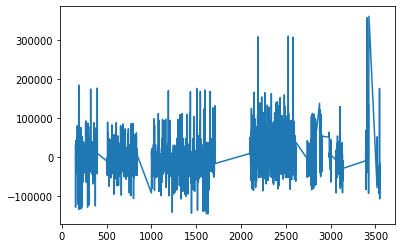

In [45]:
model.resid[0:10]
plt.plot(model.resid)

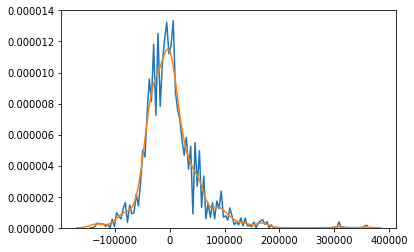

In [47]:
advres=pd.concat([ad,pd.Series(model.resid,name="resid"),pd.Series(model.predict(),name="predict")],axis=1)
sns.kdeplot(np.array(advres.resid),bw=10)
sns.distplot(np.array(advres.resid),hist=False)

In [48]:
advres = advres.dropna()
stat,p=shapiro(advres.resid)
print(stat," ",p)
#residuallar normal dağılımdan gelmiyor

0.9336140155792236   2.9490375339442453e-23


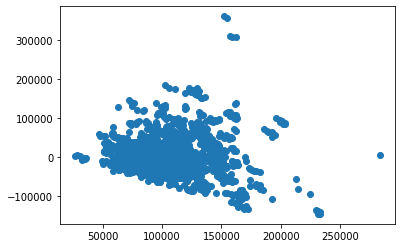

In [46]:
resid=model.resid
plt.scatter(model.predict(),resid)
#hatalar yine çok yüksek ve assumptionlara uymuyor

In [ ]:
#model daha da kötüleşti bu durumda ne yapılmalı daha farklı x kombinasyonları mı denemeliyim yoksa modeli mi değiştirmeliyim